In [186]:
# usual imports in a classic ML pipeline for Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# additional metrics ONLY for classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

<h3> Data set link </h3>
<a href="https://www.kaggle.com/datasets/sumedh1507/asthma-dataset">Asthma Risk & Severity Dataset</a>


In [187]:
# load the data
df = pd.read_csv("synthetic_asthma_dataset.csv")


# let's quickly see the first 5 rows of data
df

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ASTH109995,70,Male,25.0,Never,0,NaN,Low,Sedentary,Indoor,NaN,0.67,0,580.6,18.7,0,NaN
9996,ASTH109996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,1,417.6,40.8,0,NaN
9997,ASTH109997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,NaN,0.28,0,459.1,20.3,1,Not Controlled
9998,ASTH109998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,NaN,0.44,0,415.9,25.0,0,NaN


In [188]:
# Check value counts for Has_Asthma:
df['Has_Asthma'].value_counts()

Has_Asthma
0    7567
1    2433
Name: count, dtype: int64

In [189]:
# Check total no of records
df.shape

(10000, 17)

In [190]:
# drop Patient_ID field since it is not required
df.drop(columns=['Patient_ID'], inplace=True)
df.head()

,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [191]:
# check duplicates and missing values
df.duplicated().sum()

np.int64(0)

In [192]:
# do we have missing values? apparently not
# dataset can't have any missing values when passing the data
# to the machine learning algorithm
df.isna().sum()

Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities              4967
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
Asthma_Control_Level       7567
dtype: int64

In [193]:
# Drop the columns Comorbidities, Asthma_Control_Level
df = df.drop(columns=['Comorbidities', 'Asthma_Control_Level'])
df.isna().sum()

Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
dtype: int64

In [194]:
# Check value counts for Allergies:
df['Allergies'].value_counts()


Allergies
Dust        2479
Pollen      1999
Pets        1585
Multiple    1001
Name: count, dtype: int64

In [195]:
# Example: replace NaN with None in Allergies
df['Allergies'] = df['Allergies'].fillna("None")


In [196]:
# Check for missing values again
df.isna().sum()

Age                        0
Gender                     0
BMI                        0
Smoking_Status             0
Family_History             0
Allergies                  0
Air_Pollution_Level        0
Physical_Activity_Level    0
Occupation_Type            0
Medication_Adherence       0
Number_of_ER_Visits        0
Peak_Expiratory_Flow       0
FeNO_Level                 0
Has_Asthma                 0
dtype: int64

In [197]:
# Check value counts for Allergies:
df['Allergies'].value_counts()

Allergies
None        2936
Dust        2479
Pollen      1999
Pets        1585
Multiple    1001
Name: count, dtype: int64

In [198]:
# converts Allergies into binary since it is a nominal category

from sklearn.preprocessing import OneHotEncoder
variables = ['Allergies']
# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)
df.head()

,Age,Gender,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Allergies_Dust,Allergies_Multiple,Allergies_None,Allergies_Pets,Allergies_Pollen
0,52,Female,27.6,Former,1,Moderate,Sedentary,Outdoor,0.38,0,421.0,46.0,0,0,0,1,0,0
1,15,Male,24.6,Former,0,Low,Moderate,Indoor,0.60,2,297.6,22.9,0,1,0,0,0,0
2,72,Female,17.6,Never,0,Moderate,Moderate,Indoor,0.38,0,303.3,15.3,0,0,0,1,0,0
3,61,Male,16.8,Never,0,High,Sedentary,Outdoor,0.60,1,438.0,40.1,1,0,1,0,0,0
4,21,Male,30.2,Never,0,Moderate,Active,Indoor,0.82,3,535.0,27.7,0,0,0,1,0,0


In [199]:
df.head()

,Age,Gender,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Allergies_Dust,Allergies_Multiple,Allergies_None,Allergies_Pets,Allergies_Pollen
0,52,Female,27.6,Former,1,Moderate,Sedentary,Outdoor,0.38,0,421.0,46.0,0,0,0,1,0,0
1,15,Male,24.6,Former,0,Low,Moderate,Indoor,0.60,2,297.6,22.9,0,1,0,0,0,0
2,72,Female,17.6,Never,0,Moderate,Moderate,Indoor,0.38,0,303.3,15.3,0,0,0,1,0,0
3,61,Male,16.8,Never,0,High,Sedentary,Outdoor,0.60,1,438.0,40.1,1,0,1,0,0,0
4,21,Male,30.2,Never,0,Moderate,Active,Indoor,0.82,3,535.0,27.7,0,0,0,1,0,0


In [200]:
df.shape

(10000, 18)

In [201]:
# Check value counts for Gender:
df['Gender'].value_counts()

Gender
Female    4814
Male      4786
Other      400
Name: count, dtype: int64

In [202]:
# converts Gender into binary since it is a nominal category
variables 
from sklearn.preprocessing import OneHotEncoder
variables = ['Gender']
# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)
df.head()

,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Allergies_Dust,Allergies_Multiple,Allergies_None,Allergies_Pets,Allergies_Pollen,Gender_Female,Gender_Male,Gender_Other
0,52,27.6,Former,1,Moderate,Sedentary,Outdoor,0.38,0,421.0,46.0,0,0,0,1,0,0,1,0,0
1,15,24.6,Former,0,Low,Moderate,Indoor,0.60,2,297.6,22.9,0,1,0,0,0,0,0,1,0
2,72,17.6,Never,0,Moderate,Moderate,Indoor,0.38,0,303.3,15.3,0,0,0,1,0,0,1,0,0
3,61,16.8,Never,0,High,Sedentary,Outdoor,0.60,1,438.0,40.1,1,0,1,0,0,0,0,1,0
4,21,30.2,Never,0,Moderate,Active,Indoor,0.82,3,535.0,27.7,0,0,0,1,0,0,0,1,0


In [203]:
# Check value counts for Smoking_Status:
df['Smoking_Status'].value_counts()

Smoking_Status
Never      6070
Former     2487
Current    1443
Name: count, dtype: int64

In [204]:
# Map Smoking_Status - Ordinal categories
category_mapper = {
    'Current': 2,
    'Former': 1,
    'Never': 0
}

df['Smoking_Status'] = df['Smoking_Status'].replace(category_mapper)
df.head()

,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Allergies_Dust,Allergies_Multiple,Allergies_None,Allergies_Pets,Allergies_Pollen,Gender_Female,Gender_Male,Gender_Other
0,52,27.6,1,1,Moderate,Sedentary,Outdoor,0.38,0,421.0,46.0,0,0,0,1,0,0,1,0,0
1,15,24.6,1,0,Low,Moderate,Indoor,0.60,2,297.6,22.9,0,1,0,0,0,0,0,1,0
2,72,17.6,0,0,Moderate,Moderate,Indoor,0.38,0,303.3,15.3,0,0,0,1,0,0,1,0,0
3,61,16.8,0,0,High,Sedentary,Outdoor,0.60,1,438.0,40.1,1,0,1,0,0,0,0,1,0
4,21,30.2,0,0,Moderate,Active,Indoor,0.82,3,535.0,27.7,0,0,0,1,0,0,0,1,0


In [205]:
# Check value counts for Air_Pollution_Level:
df['Air_Pollution_Level'].value_counts()

Air_Pollution_Level
Moderate    4915
Low         2984
High        2101
Name: count, dtype: int64

In [206]:
# Map Air_Pollution_Level- Ordinal categories
category_mapper = {
    'High': 2,
    'Moderate': 1,
    'Low': 0
}

df['Air_Pollution_Level'] = df['Air_Pollution_Level'].replace(category_mapper)
df.head()

,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Allergies_Dust,Allergies_Multiple,Allergies_None,Allergies_Pets,Allergies_Pollen,Gender_Female,Gender_Male,Gender_Other
0,52,27.6,1,1,1,Sedentary,Outdoor,0.38,0,421.0,46.0,0,0,0,1,0,0,1,0,0
1,15,24.6,1,0,0,Moderate,Indoor,0.60,2,297.6,22.9,0,1,0,0,0,0,0,1,0
2,72,17.6,0,0,1,Moderate,Indoor,0.38,0,303.3,15.3,0,0,0,1,0,0,1,0,0
3,61,16.8,0,0,2,Sedentary,Outdoor,0.60,1,438.0,40.1,1,0,1,0,0,0,0,1,0
4,21,30.2,0,0,1,Active,Indoor,0.82,3,535.0,27.7,0,0,0,1,0,0,0,1,0


In [207]:
# Check value counts for Physical_Activity_Level:
df['Physical_Activity_Level'].value_counts()

Physical_Activity_Level
Sedentary    4062
Moderate     3909
Active       2029
Name: count, dtype: int64

In [208]:
# Map Physical_Activity_Level- Ordinal categories
category_mapper = {
    'Active': 2,
    'Moderate': 1,
    'Sedentary': 0
}

df['Physical_Activity_Level'] = df['Physical_Activity_Level'].replace(category_mapper)
df.head()

,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Allergies_Dust,Allergies_Multiple,Allergies_None,Allergies_Pets,Allergies_Pollen,Gender_Female,Gender_Male,Gender_Other
0,52,27.6,1,1,1,0,Outdoor,0.38,0,421.0,46.0,0,0,0,1,0,0,1,0,0
1,15,24.6,1,0,0,1,Indoor,0.60,2,297.6,22.9,0,1,0,0,0,0,0,1,0
2,72,17.6,0,0,1,1,Indoor,0.38,0,303.3,15.3,0,0,0,1,0,0,1,0,0
3,61,16.8,0,0,2,0,Outdoor,0.60,1,438.0,40.1,1,0,1,0,0,0,0,1,0
4,21,30.2,0,0,1,2,Indoor,0.82,3,535.0,27.7,0,0,0,1,0,0,0,1,0


In [209]:
# Check value counts for Occupation_Type:
df['Occupation_Type'].value_counts()

Occupation_Type
Indoor     7035
Outdoor    2965
Name: count, dtype: int64

In [210]:
from sklearn.preprocessing import LabelEncoder

# list all variables that can be binary-converted
variables = ['Occupation_Type']

# load the encoder
encoder = LabelEncoder()

# convert the listed variables
df[variables] = df[variables].apply(encoder.fit_transform)

df.head()

,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Allergies_Dust,Allergies_Multiple,Allergies_None,Allergies_Pets,Allergies_Pollen,Gender_Female,Gender_Male,Gender_Other
0,52,27.6,1,1,1,0,1,0.38,0,421.0,46.0,0,0,0,1,0,0,1,0,0
1,15,24.6,1,0,0,1,0,0.60,2,297.6,22.9,0,1,0,0,0,0,0,1,0
2,72,17.6,0,0,1,1,0,0.38,0,303.3,15.3,0,0,0,1,0,0,1,0,0
3,61,16.8,0,0,2,0,1,0.60,1,438.0,40.1,1,0,1,0,0,0,0,1,0
4,21,30.2,0,0,1,2,0,0.82,3,535.0,27.7,0,0,0,1,0,0,0,1,0


<h3>There's no ordinal or nominal categories here, we can proceed to X/y -phase</h3>

In [211]:
df.head()

,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Allergies_Dust,Allergies_Multiple,Allergies_None,Allergies_Pets,Allergies_Pollen,Gender_Female,Gender_Male,Gender_Other
0,52,27.6,1,1,1,0,1,0.38,0,421.0,46.0,0,0,0,1,0,0,1,0,0
1,15,24.6,1,0,0,1,0,0.60,2,297.6,22.9,0,1,0,0,0,0,0,1,0
2,72,17.6,0,0,1,1,0,0.38,0,303.3,15.3,0,0,0,1,0,0,1,0,0
3,61,16.8,0,0,2,0,1,0.60,1,438.0,40.1,1,0,1,0,0,0,0,1,0
4,21,30.2,0,0,1,2,0,0.82,3,535.0,27.7,0,0,0,1,0,0,0,1,0


<h3>X/y and train/test -splits</h3>

In [212]:
# first step, we split our data into SUPPORT variables and the TARGET variable
# X => support variables, y => target variable

# X => list of support variables the model uses 
# while predicting the target variable with the model
X = df.drop("Has_Asthma", axis=1)

# our target variable is y
y = df["Has_Asthma"]

In [213]:
# secondly, train/test -split with scikit-learn's helper function
# 0.3 for testing => 30% of data is reserved for testing purposes
# and based on that => it's deduced that 70% will be in the training data

# you can also define the random state, which is sometimes useful
# if you want to "lock down" all the randomness in order to get same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [214]:
# initialize the scaler and process X-values
# IN MOST CASES you can experiment with StandardScaler or MinMaxWScaler
# BUT ONLY USE ONE SCALER AT A TIME FOR SUPPORT VARIABLES
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# FIT the scaler only to X-training data
# and only transform the test data with that
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [215]:
# you can inspect how the original values have now 
# switched to the scaled ones
# X_train

<h3>Train the logistic regression model</h3>

In [216]:
# create the model and train it with the data
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

<h3>Classification error metrics</h3>

In [217]:
# we need to create test predictions based on our earlier reserved test dataset
# this data has never been seen by the model by now
predictions = model.predict(X_test)

In [218]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2289
           1       0.83      0.81      0.82       711

    accuracy                           0.92      3000
   macro avg       0.89      0.88      0.88      3000
weighted avg       0.92      0.92      0.92      3000


Model overall accuracy: 91.57%


<ul>
<li>Accuracy: 92%</li>
<li>This dataset is also kind of imbalanced as Dataset is imbalanced (Class 0 = 2315, Class 1 = 685) :(</li>
<li>Accuracy looks strong but may be influenced by majority class</li>
<li>Class 0 (Majority Class): Model performs very well on this class</li>
<li>Class 1 (Minority Class): Class 1 performance is good but lower than Class 0</li>
<li>The model performs well overall, but it predicts Class 0 better than Class 1. Improvement may be needed if Class 1 is important.</li>
</ul>

<Axes: >

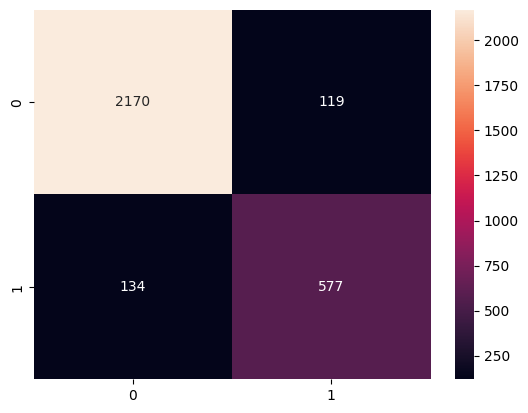

In [219]:
# see the confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

<ul>
<li>Model predicts Class 0 better than Class 1, which is expected for imbalanced datasets.</li>

<li>Misclassifications for class 1 (134) are higher than for class 0 (119), even though class 1 has fewer samples.</li>

</ul>

In [220]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means you could get the same result with just random guessing
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.9651018538488054

In [ ]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means you could get the same result with just random guessing
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.9651018538488054

<ul>
<li>ROC-AUC measures the model’s ability to distinguish between classes.</li>
<li>Score of 0.5 → random guessing; score of 1 → perfect classification.</li>
<li>Binary logistic regression is useful when ROC-AUC > 0.5</li>
<li>Model ROC-AUC = 0.965 → excellent classification performance and indicates the model reliably separates positive and negative cases.</li>
</ul>

<h3>Using the model in practice</h3>

In [221]:
df.columns

Index(['Age', 'BMI', 'Smoking_Status', 'Family_History', 'Air_Pollution_Level',
       'Physical_Activity_Level', 'Occupation_Type', 'Medication_Adherence',
       'Number_of_ER_Visits', 'Peak_Expiratory_Flow', 'FeNO_Level',
       'Has_Asthma', 'Allergies_Dust', 'Allergies_Multiple', 'Allergies_None',
       'Allergies_Pets', 'Allergies_Pollen', 'Gender_Female', 'Gender_Male',
       'Gender_Other'],
      dtype='str')

In [222]:
import pandas as pd

# Single test row (features only, without target)
tester_row = {
    'Age': 67.0,
    'BMI': 36.6,
    'Smoking_Status': 0,             # map according to your encoding                   # 0 = Male, 1 = Female, 2 = Other
    'Family_History': 1,             # 0 = No, 1 = Yes
    'Air_Pollution_Level': 1, # map or keep as text
    'Physical_Activity_Level': 1,    # 0 = Sedentary, 1 = Moderate, 2 = Active
    'Occupation_Type': 1,     # map/one-hot encode if needed
    'Medication_Adherence': 0.8,
    'Number_of_ER_Visits': 2,
    'Peak_Expiratory_Flow': 421.0,
    'FeNO_Level': 46.0,

    # One-hot encoded Allergies
    'Allergies_Dust': 0,
    'Allergies_Multiple': 0,
    'Allergies_None': 0,
    'Allergies_Pets': 0,
    'Allergies_Pollen': 1,

    'Gender_Female' : 1,
    'Gender_Male' : 0,
    'Gender_Other' : 0,
}

tester_row = pd.DataFrame([tester_row])

# SINCE WE SCALED our support variables earlier
# WE HAVE TO DO IT HERE AS WELL
tester_row = sc.transform(tester_row)



In [223]:
print("All probabilities by category:")
print(model.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Does this person has the Asthma (Yes/No):")
result = labels[model.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[0.13994094 0.86005906]]

Does this person has the Asthma (Yes/No):
Yes
-------------------
